In [2]:
# importing necessary modules
%matplotlib inline
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [3]:
# load as Pandas dataframe
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


In [6]:
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [7]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [8]:
df = df.set_index(pd.DatetimeIndex(df['login_time']))

In [9]:
# initializing count column for timestamps
df['count'] = 1

In [10]:
# resampling and counting for 15min login intervals
log_ct = df.resample('15T').sum()
log_ct.head()

,count
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


In [11]:
# creating a weekday column
log_ct['weekday'] = log_ct.index.weekday
log_ct.tail()

,count,weekday
login_time,,
1970-04-13 17:45:00,5.0,0
1970-04-13 18:00:00,5.0,0
1970-04-13 18:15:00,2.0,0
1970-04-13 18:30:00,7.0,0
1970-04-13 18:45:00,6.0,0


In [12]:
log_ct.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 2 columns):
count      9381 non-null float64
weekday    9788 non-null int64
dtypes: float64(1), int64(1)
memory usage: 229.4 KB


In [13]:
# counting NaN values
log_ct.isnull().sum()

count      407
weekday      0
dtype: int64

In [14]:
log_ct['count'] = np.nan_to_num(log_ct['count']).astype(int)

In [15]:
# dropping Nan values
log_ct.dropna().head()

,count,weekday
login_time,,
1970-01-01 20:00:00,2,3
1970-01-01 20:15:00,6,3
1970-01-01 20:30:00,9,3
1970-01-01 20:45:00,7,3
1970-01-01 21:00:00,1,3


In [16]:
log_ct.describe()

,count,weekday
count,9788.000000,9788.000000
mean,9.515938,3.035554
std,8.328818,2.012722
min,0.000000,0.000000
25%,3.000000,1.000000
50%,7.000000,3.000000
75%,13.000000,5.000000
max,73.000000,6.000000


In [17]:
log_ct.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 2 columns):
count      9788 non-null int64
weekday    9788 non-null int64
dtypes: int64(2)
memory usage: 229.4 KB


Text(0.5,0,'Dates')

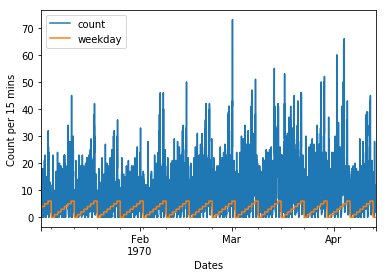

In [18]:
# plotting everything
log_ct.plot()
plt.ylabel('Count per 15 mins')
plt.xlabel('Dates')

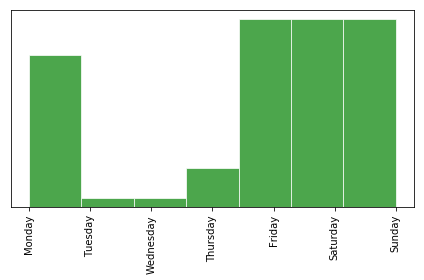

In [19]:
# plotting histogram of login counts by weekday
plt.hist(log_ct['weekday'], color='g', alpha=0.7, edgecolor='w', bins=7, log=True)
plt.xticks([0,1,2,3,4,5,6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=90)
plt.tight_layout()
plt.show()

In [20]:
# finding high demand day of the week
log_ct[log_ct['count'] == 73]

,count,weekday
login_time,,
1970-03-01 04:30:00,73,6


Looks like the outlier/highest demand day was on Sunday.

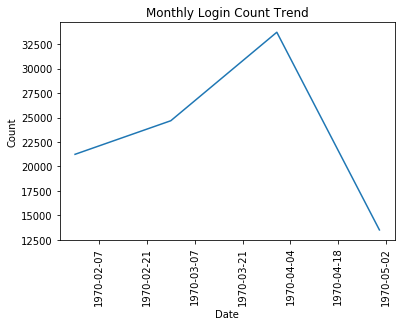

In [24]:
# monthly login count trend 
plt.plot(log_ct['count'].resample('M').sum())
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('Date')
plt.title('Monthly Login Count Trend')
plt.show()

It looks like overall logins peaked at the end of March and been falling rapidly since then.